In [1]:
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.io import read_image
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
from utils import shuffle_channel

In [9]:
test = torch.Tensor([[[0, 0],
                      [0, 0]],
                     [[1, 1],
                      [1, 1]],
                     [[2, 2],
                      [2, 2]]])

In [19]:
shuffle_channel(test, 3)

tensor([[[1., 1.],
         [1., 1.]],

        [[2., 2.],
         [2., 2.]],

        [[0., 0.],
         [0., 0.]]])

0 = rgb
1 = rbg
2 = grb
3 = gbr
4 = brg
5 = bgr

In [35]:
image = read_image("data/tiny-imagenet-200/train/n01443537/images/n01443537_464.JPEG", )

In [36]:
image.size(2)

64

In [37]:
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = transforms.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])


In [38]:
r = image.size(2) // 2
r2 = image.size(2)
loc = 0
rot = 1

In [39]:
if loc == 3:
    w1 = 0
    w2 = r
    h1 = 0
    h2 = r
elif loc == 2:
    w1 = 0
    w2 = r
    h1 = r
    h2 = r2
elif loc == 0:
    w1 = r
    w2 = r2
    h1 = 0
    h2 = r
elif loc == 1:
    w1 = r
    w2 = r2
    h1 = r
    h2 = r2

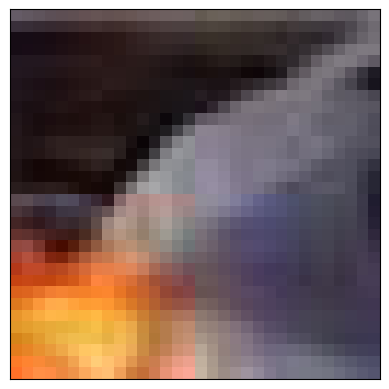

In [40]:
show(image[:,h1:h2, w1:w2 ].unsqueeze(0))

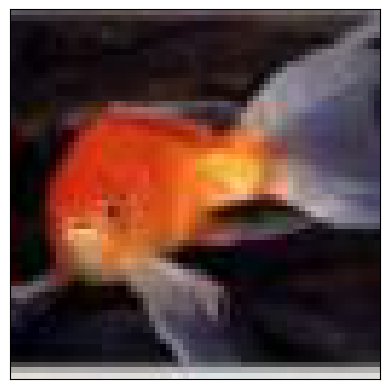

In [41]:
show(image.unsqueeze(0))

In [42]:
image[:,h1:h2, w1:w2 ].dtype

torch.uint8

In [43]:
save_image(image[:,h1:h2, w1:w2 ] / 255.0, '/media/aristo/Data A/documents/kuliah/Project/image/patch.jpg')

In [44]:
rot_patch = torch.rot90(image[:,h1:h2, w1:w2], 1, [1,2] )

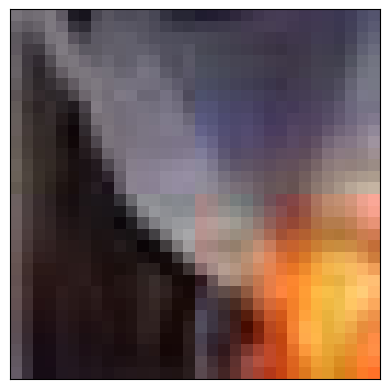

In [45]:
show(rot_patch.unsqueeze(0))

In [46]:
save_image(rot_patch / 255.0, '/media/aristo/Data A/documents/kuliah/Project/image/rot-patch.jpg')

In [47]:
sc_patch =shuffle_channel(rot_patch, 1)

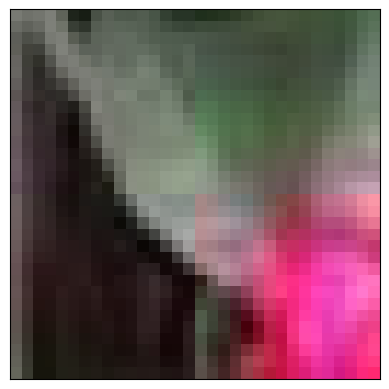

In [48]:
show(sc_patch.unsqueeze(0))

In [49]:
save_image(sc_patch / 255.0, '/media/aristo/Data A/documents/kuliah/Project/image/sc-patch.jpg')

In [50]:
image_transform = image.clone().detach()

In [51]:
image_transform[:,h1:h2, w1:w2 ] = sc_patch

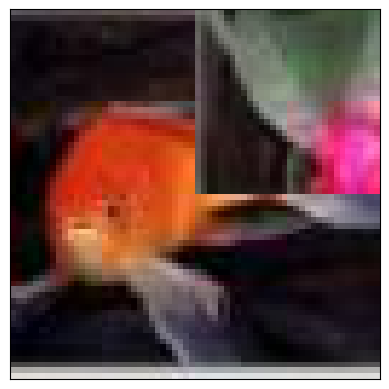

In [53]:
show(image_transform.unsqueeze(0))

In [54]:
save_image(image_transform/ 255.0, '/media/aristo/Data A/documents/kuliah/Project/image/image-transform.jpg')